##  PARCEIROS 360

###  Comissão - Financeiro & Churn

- <b>Analista(s)</b>: Victor Hugo
- <b>Projeto</b>: Parceiros 360 - Um modelo de análise de risco para auxiliar no controle das tomadas de decisões através de análises preditivas
- <b>Data</b>: 19/10/2022
- <b>Pilar</b>: Comissão
- <b>Indicador/KPI</b>: Comissão - Financeiro & Churn
- <b>Fator de Sensibilidade e Ausência</b>: 5% (Sensibilidade) e 0,08 (Ausência)
- <b>Descrição</b>: Exploração dos dados da bases '20221017 - TBL_QUANT_COMISSAO' (.csv e .xlsx).

![title](imgs/kpi_06.png)

In [1]:
!python --version

Python 3.8.12


### BIBLIOTECA:

In [2]:
## data
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta
from unicodedata import normalize

## vis
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## modelo
from sklearn import preprocessing

## alertas
import warnings
warnings.filterwarnings("ignore")

### LAYOUT:

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

rc={'font.size': 16, 'axes.labelsize': 16, 'legend.fontsize': 16,
    'axes.titlesize': 18, 'xtick.labelsize': 16, 'ytick.labelsize': 16}

sns.set(rc=rc)
sns.set_style("darkgrid")
sns.set_palette("pastel")

### CONFIG:

In [4]:
#pd.set_option('max_columns', 200)
pd.options.display.max_columns = 200 

seed = 42
np.random.seed(seed)

### DADOS:

In [5]:
PATH = "datasets/"

In [6]:
FILE = '20221017 - TBL_QUANT_COMISSAO.csv'
comissao = pd.read_csv(PATH + FILE, sep = ';', dtype=str, encoding = 'ISO-8859-1')
comissao.head()

,SEGMENTO,CANAL,RAIZ_CNPJ,TP_SERVICO,SAFRA_ALTA,UF,AGRUPAMENTO_MACRO,PLATAFORMA,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,MES_COMPETENCIA,VALOR_COMISSAO_2020,ALTAS_2020,QTD_ESTORNO_2020,INDICADOR_RISCO_FIN,FATOR_RISCO,PCT_CHURN,CLASSE,RISCO_PARCEIRO
0,B2C,Revenda,05970906,CAPTACAO,202205,ES,LOJA CURBANI,MOVEL,1,23480.81,339,8,01/05/2022,8527.55,160,12,Baixo Risco,Melhoria Contínua Na Receita,0.1114,VERDE,Risco Baixo
1,B2C,Revenda,03231720,OUTROS,202201,MG,TELECELL,FIXA,1,140,2,1,01/01/2022,11377.21,2536,210,Baixo Risco,Melhoria Contínua Na Receita,0.1413,VERDE,Risco Baixo
2,B2C,Revenda,00308055,CAPTACAO,202202,RS,COMMCENTER,MOVEL,1,844505.96,5396,563,01/02/2022,596339.41,4810,510,Baixo Risco,Deterioração Recente Na Receita,0.1235,VERDE,Risco Baixo
3,B2C,Revenda,02183776,OUTROS,202201,SP,ALPHA FONE,MOVEL,1,9312.8,463,70,01/01/2022,7478.76,774,70,Baixo Risco,Deterioração Recente Na Receita,0.1429,VERDE,Risco Baixo
4,B2C,Revenda,06368199,CAPTACAO,202206,BA,CELLINE,MOVEL,1,10129.8,175,5,01/06/2022,6068.37,92,3,Médio Risco,Melhora No Curto Prazo Apenas,0.1667,VERDE,Risco Baixo


In [7]:
comissao.columns = ['SEGMENTO', 'CANAL', 'RAIZ_CNPJ', 'TP_SERVICO', 'SAFRA_ALTA', 
                    'UF', 'NOME_FORNECEDOR', 'PLATAFORMA', 'DOC_SAP', 
                    'VALOR_COMISSAO', 'QTD_ALTAS', 'QTD_ESTORNO', 'COMPETENCIA', 
                    'VALOR_COMISSAO_2020', 'ALTAS_2020', 'QTD_ESTORNO_2020', 
                    'INDICADOR_RISCO_FIN', 'FATOR_RISCO', 'PCT_CHURN', 
                    'CLASSE', 'RISCO_PARCEIRO']

In [8]:
for i in comissao.columns:
    if comissao[i].dtypes=='object':
        comissao[i] = comissao[i].str.upper()
        
comissao.head(3)

,SEGMENTO,CANAL,RAIZ_CNPJ,TP_SERVICO,SAFRA_ALTA,UF,NOME_FORNECEDOR,PLATAFORMA,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,COMPETENCIA,VALOR_COMISSAO_2020,ALTAS_2020,QTD_ESTORNO_2020,INDICADOR_RISCO_FIN,FATOR_RISCO,PCT_CHURN,CLASSE,RISCO_PARCEIRO
0,B2C,REVENDA,05970906,CAPTACAO,202205,ES,LOJA CURBANI,MOVEL,1,23480.81,339,8,01/05/2022,8527.55,160,12,BAIXO RISCO,MELHORIA CONTÍNUA NA RECEITA,0.1114,VERDE,RISCO BAIXO
1,B2C,REVENDA,03231720,OUTROS,202201,MG,TELECELL,FIXA,1,140,2,1,01/01/2022,11377.21,2536,210,BAIXO RISCO,MELHORIA CONTÍNUA NA RECEITA,0.1413,VERDE,RISCO BAIXO
2,B2C,REVENDA,00308055,CAPTACAO,202202,RS,COMMCENTER,MOVEL,1,844505.96,5396,563,01/02/2022,596339.41,4810,510,BAIXO RISCO,DETERIORAÇÃO RECENTE NA RECEITA,0.1235,VERDE,RISCO BAIXO


In [9]:
comissao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65145 entries, 0 to 65144
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SEGMENTO             65145 non-null  object
 1   CANAL                65145 non-null  object
 2   RAIZ_CNPJ            65057 non-null  object
 3   TP_SERVICO           65143 non-null  object
 4   SAFRA_ALTA           65145 non-null  object
 5   UF                   65144 non-null  object
 6   NOME_FORNECEDOR      65137 non-null  object
 7   PLATAFORMA           65145 non-null  object
 8   DOC_SAP              65145 non-null  object
 9   VALOR_COMISSAO       65145 non-null  object
 10  QTD_ALTAS            65141 non-null  object
 11  QTD_ESTORNO          65145 non-null  object
 12  COMPETENCIA          65145 non-null  object
 13  VALOR_COMISSAO_2020  48038 non-null  object
 14  ALTAS_2020           48038 non-null  object
 15  QTD_ESTORNO_2020     48038 non-null  object
 16  INDI

In [10]:
comissao.describe().T

,count,unique,top,freq
SEGMENTO,65145,3,B2C,38514
CANAL,65145,21,CONSULTIVO,25967
RAIZ_CNPJ,65057,850,41332795,1309
TP_SERVICO,65143,3,OUTROS,25190
SAFRA_ALTA,65145,19,202102,3922
UF,65144,27,SP,16430
NOME_FORNECEDOR,65137,738,IDEAL COMUNICACOES,1298
PLATAFORMA,65145,3,MOVEL,32241
DOC_SAP,65145,1,1,65145
VALOR_COMISSAO,65145,56127,0,1680


- <b>SEGMENTO</b>: ?
- <b>CANAL</b>: ?
- <b>RAIZ_CNPJ</b>: Os oito primeiros dígitos do CNPJ do fornecedor.
- <b>TP_SERVICO</b>: ?
- <b>SAFRA_ALTA</b>: ?
- <b>UF</b>: Corresponde a qual UF:
    - Da prestação do serviço?
    - De faturamento/pagamento ?
- <b>NOME_FORNECEDOR (ORIGINAL: AGRUPAMENTO_MACRO)</b>: Nome do fornecedor.
    - Nome fantasia?
    - Razão social?
    - Nome abreviado?
- <b>PLATAFORMA</b>: ?
- <b>DOC_SAP</b>: ?
- <b>VALOR_COMISSAO</b>: ?
- <b>QTD_ALTAS</b>: ?
- <b>QTD_ESTORNO</b>: ?
- <b>COMPETENCIA (ORIGINAL: MES_COMPETENCIA)</b>: Mês de competência.
- <b>VALOR_COMISSAO_2020</b>: ?
- <b>ALTAS_2020</b>: ?
- <b>QTD_ESTORNO_2020</b>: ?
- <b>INDICADOR_RISCO_FIN</b>: ?
- <b>FATOR_RISCO</b>: ?
- <b>PCT_CHURN</b>: ?
- <b>CLASSE</b>: ?
- <b>RISCO_PARCEIRO</b>: Risco.

<b>*ORIGINAL</b>: Nome original no arquivo (.csv / .xlsx)

### AJUSTE DAS COLUNAS:

### Formatar colunas do tipo data:

In [11]:
comissao['COMPETENCIA'] = comissao['COMPETENCIA'] \
        .apply(lambda x: '{}-{}-{}'.format(x[6:], x[3:5], x[:2]))
comissao['COMPETENCIA'] = pd.to_datetime(comissao['COMPETENCIA'])

In [12]:
comissao['SAFRA_ALTA'] = comissao['SAFRA_ALTA'].fillna(value = '199901')
comissao['SAFRA_ALTA'] = comissao['SAFRA_ALTA'].apply(lambda x: pd.to_datetime(str(x) + '01'))

In [13]:
comissao[['RAIZ_CNPJ', 'NOME_FORNECEDOR', 'COMPETENCIA', 'SAFRA_ALTA']].head()

,RAIZ_CNPJ,NOME_FORNECEDOR,COMPETENCIA,SAFRA_ALTA
0,05970906,LOJA CURBANI,2022-05-01,2022-05-01
1,03231720,TELECELL,2022-01-01,2022-01-01
2,00308055,COMMCENTER,2022-02-01,2022-02-01
3,02183776,ALPHA FONE,2022-01-01,2022-01-01
4,06368199,CELLINE,2022-06-01,2022-06-01


#### Preenchimento de registros vazios supostamente numérios em seguida conversão:

In [14]:
comissao['DOC_SAP'] = comissao['DOC_SAP'].fillna('0').astype(int)
comissao['QTD_ALTAS'] = comissao['QTD_ALTAS'].fillna('0').astype(int)
comissao['QTD_ESTORNO'] = comissao['QTD_ESTORNO'].fillna('0').astype(int)
comissao['ALTAS_2020'] = comissao['ALTAS_2020'].fillna('0').astype(int)
comissao['QTD_ESTORNO_2020'] = comissao['QTD_ESTORNO_2020'].fillna('0').astype(int)

In [15]:
comissao['VALOR_COMISSAO'] = comissao['VALOR_COMISSAO'].fillna('0').astype(float)
comissao['VALOR_COMISSAO_2020'] = comissao['VALOR_COMISSAO_2020'].fillna('0').astype(float)
comissao['PCT_CHURN'] = comissao['PCT_CHURN'].fillna('0').astype(float)

In [16]:
comissao[['RAIZ_CNPJ', 'NOME_FORNECEDOR', 'DOC_SAP', 
          'QTD_ALTAS', 'QTD_ESTORNO', 'VALOR_COMISSAO', 
          'PCT_CHURN']].head()

,RAIZ_CNPJ,NOME_FORNECEDOR,DOC_SAP,QTD_ALTAS,QTD_ESTORNO,VALOR_COMISSAO,PCT_CHURN
0,05970906,LOJA CURBANI,1,339,8,23480.81,0.1114
1,03231720,TELECELL,1,2,1,140.00,0.1413
2,00308055,COMMCENTER,1,5396,563,844505.96,0.1235
3,02183776,ALPHA FONE,1,463,70,9312.80,0.1429
4,06368199,CELLINE,1,175,5,10129.80,0.1667


#### Preenchimento de registros vazios 'string':

In [17]:
comissao['SEGMENTO'] = comissao['SEGMENTO'].fillna(value = 'VAZIO')
comissao['CANAL'] = comissao['CANAL'].fillna(value = 'VAZIO')
comissao['TP_SERVICO'] = comissao['TP_SERVICO'].fillna(value = 'VAZIO')
comissao['UF'] = comissao['UF'].fillna(value = 'VAZIO')
comissao['NOME_FORNECEDOR'] = comissao['NOME_FORNECEDOR'].fillna(value = 'VAZIO')
comissao['PLATAFORMA'] = comissao['PLATAFORMA'].fillna(value = 'VAZIO')
comissao['INDICADOR_RISCO_FIN'] = comissao['INDICADOR_RISCO_FIN'].fillna(value = 'VAZIO')
comissao['FATOR_RISCO'] = comissao['FATOR_RISCO'].fillna(value = 'VAZIO')
comissao['CLASSE'] = comissao['CLASSE'].fillna(value = 'VAZIO')
comissao['RISCO_PARCEIRO'] = comissao['RISCO_PARCEIRO'].fillna(value = 'VAZIO')

In [18]:
comissao[['RAIZ_CNPJ', 'NOME_FORNECEDOR', 'SEGMENTO', 'CANAL', 
          'TP_SERVICO', 'UF', 'PLATAFORMA', 'INDICADOR_RISCO_FIN', 
          'FATOR_RISCO', 'CLASSE', 'RISCO_PARCEIRO']].head()

,RAIZ_CNPJ,NOME_FORNECEDOR,SEGMENTO,CANAL,TP_SERVICO,UF,PLATAFORMA,INDICADOR_RISCO_FIN,FATOR_RISCO,CLASSE,RISCO_PARCEIRO
0,05970906,LOJA CURBANI,B2C,REVENDA,CAPTACAO,ES,MOVEL,BAIXO RISCO,MELHORIA CONTÍNUA NA RECEITA,VERDE,RISCO BAIXO
1,03231720,TELECELL,B2C,REVENDA,OUTROS,MG,FIXA,BAIXO RISCO,MELHORIA CONTÍNUA NA RECEITA,VERDE,RISCO BAIXO
2,00308055,COMMCENTER,B2C,REVENDA,CAPTACAO,RS,MOVEL,BAIXO RISCO,DETERIORAÇÃO RECENTE NA RECEITA,VERDE,RISCO BAIXO
3,02183776,ALPHA FONE,B2C,REVENDA,OUTROS,SP,MOVEL,BAIXO RISCO,DETERIORAÇÃO RECENTE NA RECEITA,VERDE,RISCO BAIXO
4,06368199,CELLINE,B2C,REVENDA,CAPTACAO,BA,MOVEL,MÉDIO RISCO,MELHORA NO CURTO PRAZO APENAS,VERDE,RISCO BAIXO


In [19]:
comissao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65145 entries, 0 to 65144
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SEGMENTO             65145 non-null  object        
 1   CANAL                65145 non-null  object        
 2   RAIZ_CNPJ            65057 non-null  object        
 3   TP_SERVICO           65145 non-null  object        
 4   SAFRA_ALTA           65145 non-null  datetime64[ns]
 5   UF                   65145 non-null  object        
 6   NOME_FORNECEDOR      65145 non-null  object        
 7   PLATAFORMA           65145 non-null  object        
 8   DOC_SAP              65145 non-null  int32         
 9   VALOR_COMISSAO       65145 non-null  float64       
 10  QTD_ALTAS            65145 non-null  int32         
 11  QTD_ESTORNO          65145 non-null  int32         
 12  COMPETENCIA          65145 non-null  datetime64[ns]
 13  VALOR_COMISSAO_2020  65145 non-

### ANÁLISES:

#### Existem fornecedores/parceiros com identificadores vazios. 

- Preencher a 'RAIZ_CNPJ' partir do 'NOME_FORNECEDOR' ? Lembrando que a 'RAIZ_CNPJ' é a chave usada no relacionamento com as outras bases.
- Preencher o 'NOME_FORNECEDOR' partir da 'RAIZ_CNPJ' ?

In [20]:
comissao['RAIZ_CNPJ'] = comissao['RAIZ_CNPJ'].fillna(value = '-1')

In [21]:
comissao[comissao['RAIZ_CNPJ'] == "-1"][['NOME_FORNECEDOR']].value_counts()

NOME_FORNECEDOR
VIACOM             52
VIKSTAR            23
VAZIO               8
SERCOM              4
EVOLUA              1
dtype: int64

In [22]:
comissao[comissao['NOME_FORNECEDOR'] == "VAZIO"][['RAIZ_CNPJ']].value_counts()

RAIZ_CNPJ
-1           8
dtype: int64

In [23]:
comissao[comissao['RAIZ_CNPJ'] == "-1"][['COMPETENCIA']].value_counts()

COMPETENCIA
2021-02-01     13
2021-01-01     12
2021-03-01     12
2021-04-01     12
2021-05-01      9
2021-07-01      9
2021-08-01      6
2021-06-01      5
2021-09-01      5
2021-10-01      5
dtype: int64

#### Valores de algumas características:

In [24]:
comissao['SEGMENTO'].value_counts(dropna=False, ascending=False).head(12)

B2C    38514
B2B    26626
NAO        5
Name: SEGMENTO, dtype: int64

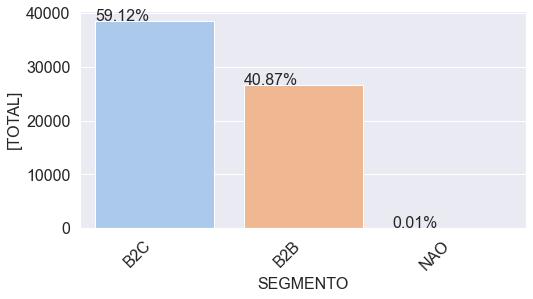

In [25]:
fig = plt.figure(figsize=(8, 4))
ax = sns.countplot(x=comissao['SEGMENTO'], order=['B2C', 'B2B', 'NAO'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()/len(comissao)*100), (p.get_x(), p.get_height()+1))
    
plt.xlabel('SEGMENTO')
plt.ylabel('[TOTAL]')
plt.show()

In [26]:
comissao['CANAL'].value_counts(dropna=False, ascending=False).head(12)

CONSULTIVO             25967
REVENDA                21622
PAP                     8936
VAREJO                  4611
DISTRIBUIDOR            2045
PAP UNIFICADO            490
TELEVENDAS OUTBOUND      374
DIGITAL                  336
CROSS-SELLING            270
TELEVENDAS REGIONAL      190
TELEVENDAS INBOUND       104
ESPECIALISTA TI          104
Name: CANAL, dtype: int64

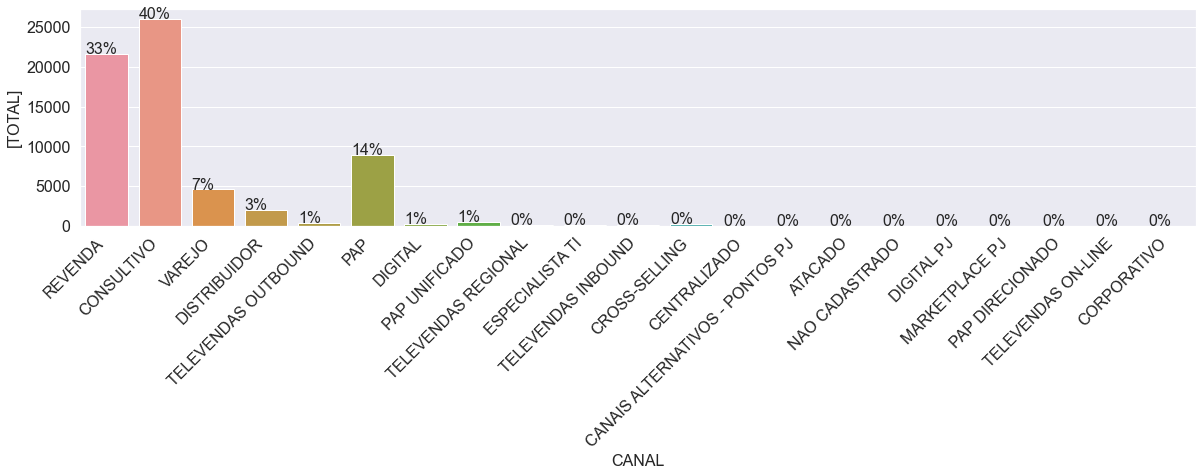

In [27]:
fig = plt.figure(figsize=(20, 4))
ax = sns.countplot(x=comissao['CANAL'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()/len(comissao)*100), (p.get_x(), p.get_height()))
    
plt.xlabel('CANAL')
plt.ylabel('[TOTAL]')
plt.show()

In [28]:
comissao['TP_SERVICO'].value_counts(dropna=False, ascending=False).head(12)

OUTROS            25190
CAPTACAO          23977
RENTABILIZACAO    15976
VAZIO                 2
Name: TP_SERVICO, dtype: int64

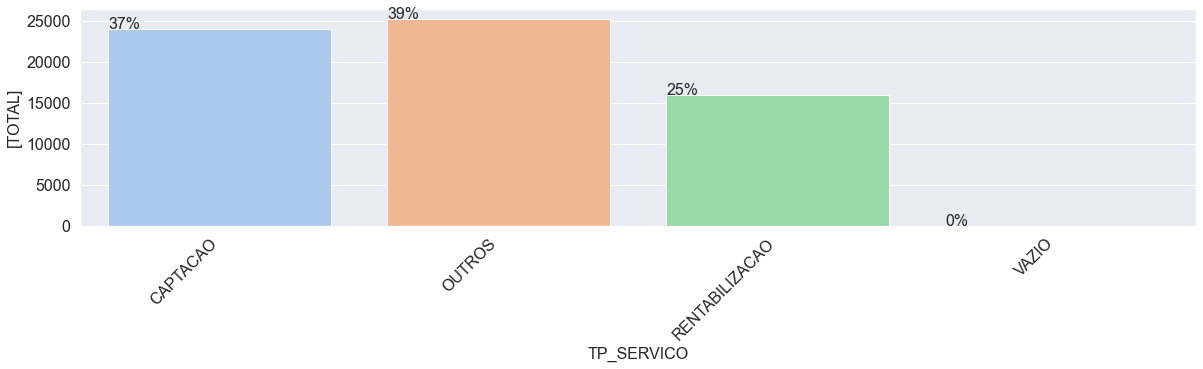

In [29]:
fig = plt.figure(figsize=(20, 4))
ax = sns.countplot(x=comissao['TP_SERVICO'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()/len(comissao)*100), (p.get_x(), p.get_height()))
    
plt.xlabel('TP_SERVICO')
plt.ylabel('[TOTAL]')
plt.show()

In [30]:
comissao['PLATAFORMA'].value_counts(dropna=False, ascending=False).head(12)

MOVEL     32241
FIXA      20689
OUTROS    12215
Name: PLATAFORMA, dtype: int64

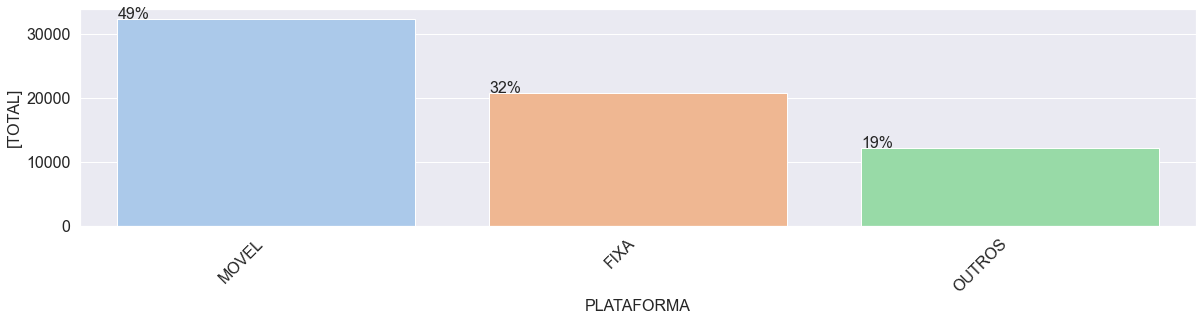

In [31]:
fig = plt.figure(figsize=(20, 4))
ax = sns.countplot(x=comissao['PLATAFORMA'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()/len(comissao)*100), (p.get_x(), p.get_height()))
    
plt.xlabel('PLATAFORMA')
plt.ylabel('[TOTAL]')
plt.show()

In [32]:
comissao['INDICADOR_RISCO_FIN'].value_counts(dropna=False, ascending=False).head(12)

BAIXO RISCO    33538
VAZIO          13497
ALTO RISCO     11901
MÉDIO RISCO     6209
Name: INDICADOR_RISCO_FIN, dtype: int64

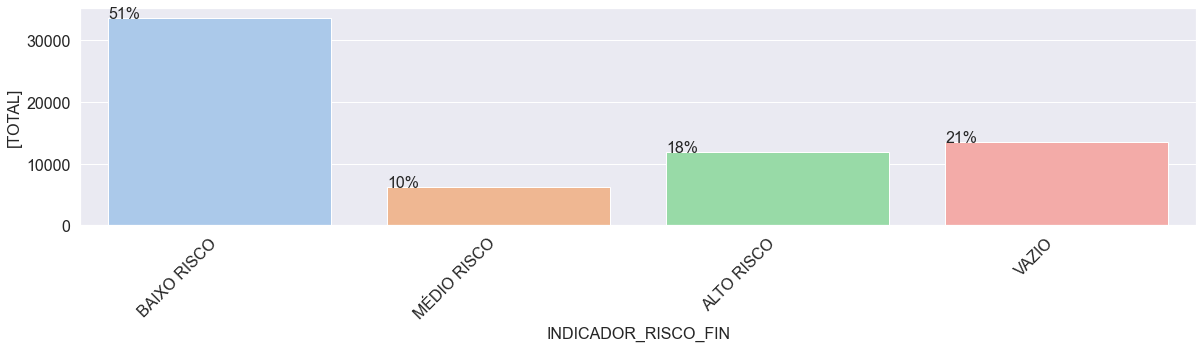

In [33]:
fig = plt.figure(figsize=(20, 4))
ax = sns.countplot(x=comissao['INDICADOR_RISCO_FIN'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()/len(comissao)*100), (p.get_x(), p.get_height()))
    
plt.xlabel('INDICADOR_RISCO_FIN')
plt.ylabel('[TOTAL]')
plt.show()

In [34]:
comissao['FATOR_RISCO'].value_counts(dropna=False, ascending=False).head(12)

VAZIO                                         13497
MELHORIA CONTÍNUA NA RECEITA                  11462
PIORA NO CURTO PRAZO APENAS                   10340
MELHORIA DE MÉDIO A LONGO PRAZO NA RECEITA     8174
DETERIORAÇÃO LONGA DE RECEITA                  7083
DETERIORAÇÃO RECENTE NA RECEITA                6562
MELHORA NO CURTO PRAZO APENAS                  3209
DÍVIDA TRABALHISTA ELEVADA                     1957
SEM COMISSÃO OU APENAS ESTORNO EM M0           1657
PIORA CONTÍNUA NA RECEITA                      1204
Name: FATOR_RISCO, dtype: int64

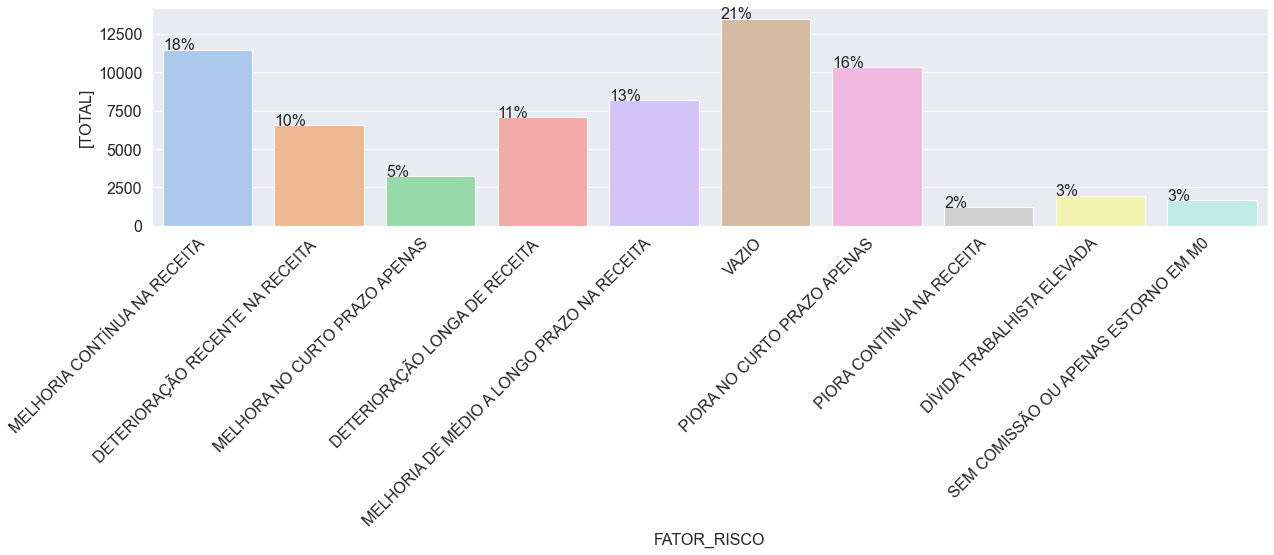

In [35]:
fig = plt.figure(figsize=(20, 4))
ax = sns.countplot(x=comissao['FATOR_RISCO'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()/len(comissao)*100), (p.get_x(), p.get_height()))
    
plt.xlabel('FATOR_RISCO')
plt.ylabel('[TOTAL]')
plt.show()

In [36]:
comissao['CLASSE'].value_counts(dropna=False, ascending=False).head(12)

VERDE       33106
AMARELO     13459
VAZIO       11866
VERMELHO     4299
LARANJA      2415
Name: CLASSE, dtype: int64

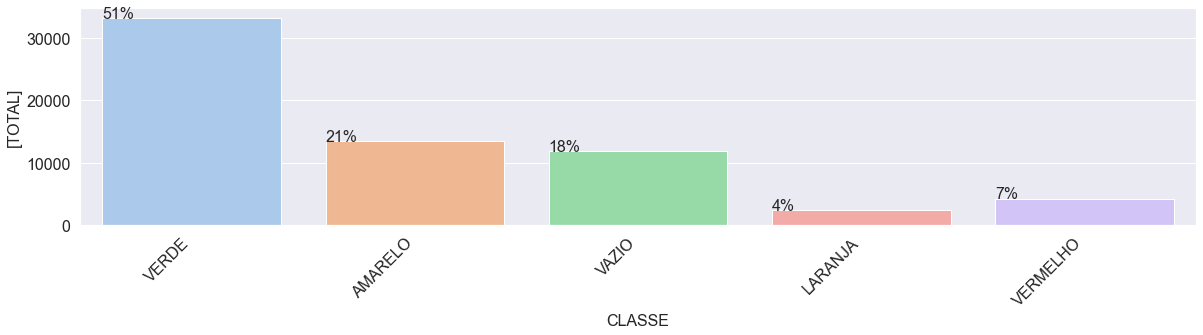

In [37]:
fig = plt.figure(figsize=(20, 4))
ax = sns.countplot(x=comissao['CLASSE'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()/len(comissao)*100), (p.get_x(), p.get_height()))
    
plt.xlabel('CLASSE')
plt.ylabel('[TOTAL]')
plt.show()

In [38]:
comissao['RISCO_PARCEIRO'].value_counts(dropna=False, ascending=False).head(12)

RISCO BAIXO     40479
RISCO MÉDIO     16430
RISCO ALTO       5748
NÃO AVALIADO     2488
Name: RISCO_PARCEIRO, dtype: int64

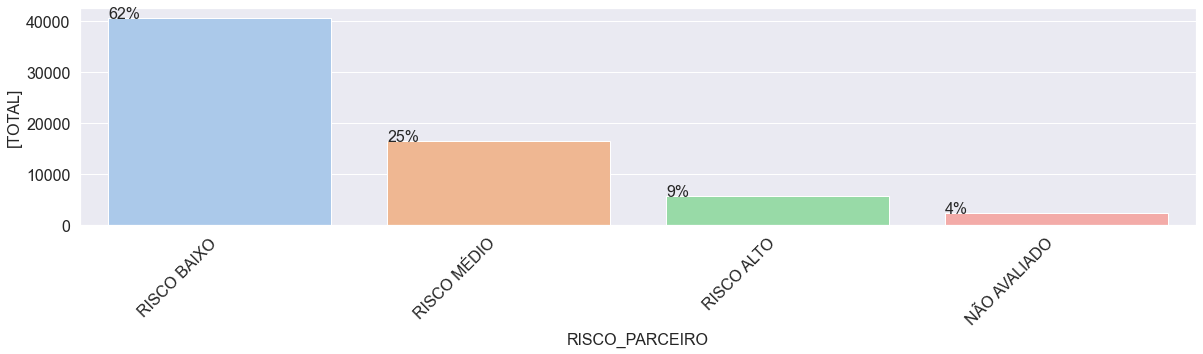

In [39]:
fig = plt.figure(figsize=(20, 4))
ax = sns.countplot(x=comissao['RISCO_PARCEIRO'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(p.get_height()/len(comissao)*100), (p.get_x(), p.get_height()))
    
plt.xlabel('RISCO_PARCEIRO')
plt.ylabel('[TOTAL]')
plt.show()

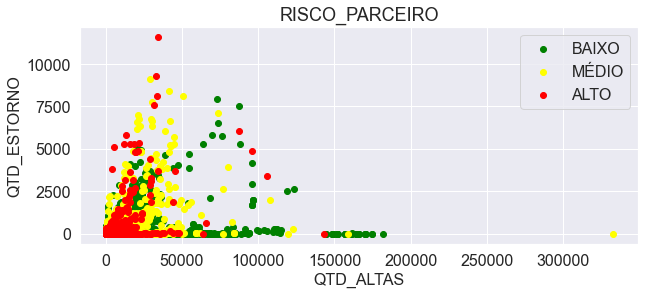

In [40]:
plt.figure(figsize=(10, 4))

columns = ['QTD_ALTAS', 'QTD_ESTORNO', 'RISCO_PARCEIRO']
colors = ['green', 'yellow', 'red']

plt.scatter(comissao[comissao[columns[2]].str.contains('BAIXO')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('BAIXO')==True][columns[1]], 
            c = colors[0], label = 'BAIXO')

plt.scatter(comissao[comissao[columns[2]].str.contains('MÉDIO')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('MÉDIO')==True][columns[1]], 
            c = colors[1], label = 'MÉDIO')

plt.scatter(comissao[comissao[columns[2]].str.contains('ALTO')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('ALTO')==True][columns[1]], 
            c = colors[2], label = 'ALTO')

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title(columns[2])
plt.legend()
plt.show()

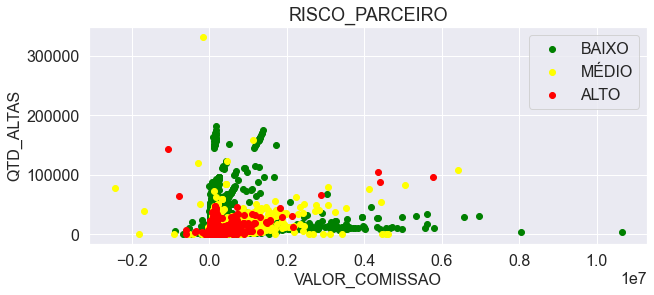

In [41]:
plt.figure(figsize=(10, 4))

columns = ['VALOR_COMISSAO', 'QTD_ALTAS', 'RISCO_PARCEIRO']
colors = ['green', 'yellow', 'red']

plt.scatter(comissao[comissao[columns[2]].str.contains('BAIXO')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('BAIXO')==True][columns[1]], 
            c = colors[0], label = 'BAIXO')

plt.scatter(comissao[comissao[columns[2]].str.contains('MÉDIO')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('MÉDIO')==True][columns[1]], 
            c = colors[1], label = 'MÉDIO')

plt.scatter(comissao[comissao[columns[2]].str.contains('ALTO')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('ALTO')==True][columns[1]], 
            c = colors[2], label = 'ALTO')

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title(columns[2])
plt.legend()
plt.show()

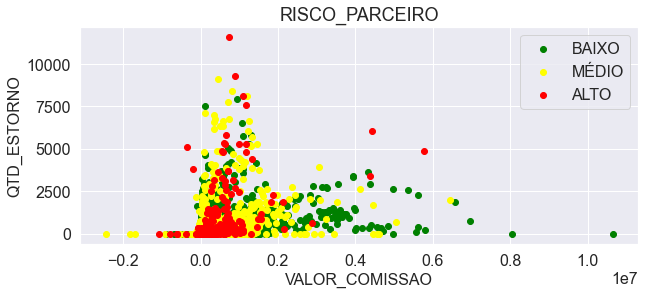

In [42]:
plt.figure(figsize=(10, 4))

columns = ['VALOR_COMISSAO', 'QTD_ESTORNO', 'RISCO_PARCEIRO']
colors = ['green', 'yellow', 'red']

plt.scatter(comissao[comissao[columns[2]].str.contains('BAIXO')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('BAIXO')==True][columns[1]], 
            c = colors[0], label = 'BAIXO')

plt.scatter(comissao[comissao[columns[2]].str.contains('MÉDIO')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('MÉDIO')==True][columns[1]], 
            c = colors[1], label = 'MÉDIO')

plt.scatter(comissao[comissao[columns[2]].str.contains('ALTO')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('ALTO')==True][columns[1]], 
            c = colors[2], label = 'ALTO')

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title(columns[2])
plt.legend()
plt.show()

In [43]:
comissao.set_index(['RAIZ_CNPJ', 'COMPETENCIA'], inplace=True)

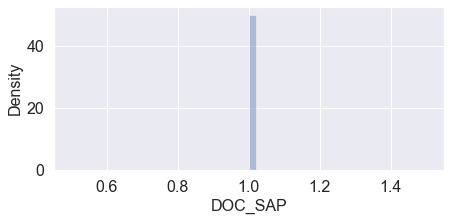

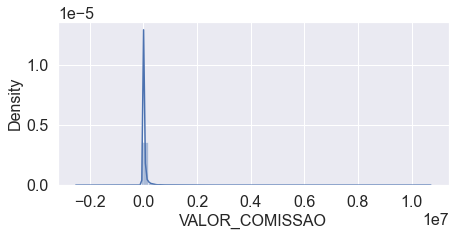

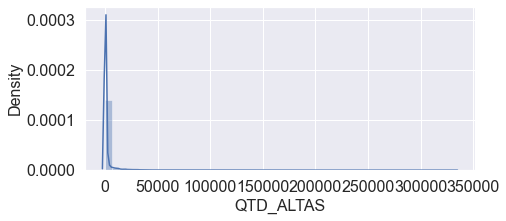

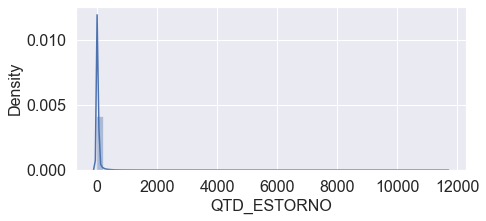

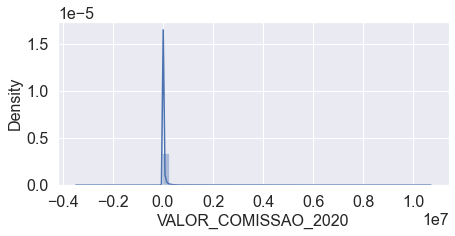

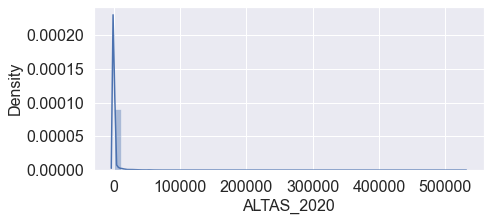

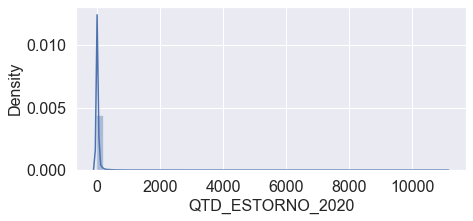

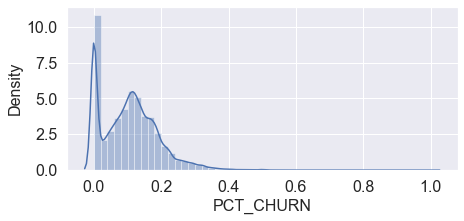

In [44]:
def distplotfeature(temp, column, order=False):
    ##vis
    fig = plt.figure(figsize=(7, 3))
    g = sns.distplot(temp[column], kde=True, color="b")
    ##plot
    plt.show()

for i in comissao.columns:
    if 'int' in str(comissao[i].dtypes) or 'float' in str(comissao[i].dtypes):
        distplotfeature(comissao[[i]], i)


In [45]:
comissao.reset_index(drop=False, inplace=True)
comissao.head(3)

,RAIZ_CNPJ,COMPETENCIA,SEGMENTO,CANAL,TP_SERVICO,SAFRA_ALTA,UF,NOME_FORNECEDOR,PLATAFORMA,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,VALOR_COMISSAO_2020,ALTAS_2020,QTD_ESTORNO_2020,INDICADOR_RISCO_FIN,FATOR_RISCO,PCT_CHURN,CLASSE,RISCO_PARCEIRO
0,05970906,2022-05-01,B2C,REVENDA,CAPTACAO,2022-05-01,ES,LOJA CURBANI,MOVEL,1,23480.81,339,8,8527.55,160,12,BAIXO RISCO,MELHORIA CONTÍNUA NA RECEITA,0.1114,VERDE,RISCO BAIXO
1,03231720,2022-01-01,B2C,REVENDA,OUTROS,2022-01-01,MG,TELECELL,FIXA,1,140.00,2,1,11377.21,2536,210,BAIXO RISCO,MELHORIA CONTÍNUA NA RECEITA,0.1413,VERDE,RISCO BAIXO
2,00308055,2022-02-01,B2C,REVENDA,CAPTACAO,2022-02-01,RS,COMMCENTER,MOVEL,1,844505.96,5396,563,596339.41,4810,510,BAIXO RISCO,DETERIORAÇÃO RECENTE NA RECEITA,0.1235,VERDE,RISCO BAIXO


In [46]:
comissao.COMPETENCIA = comissao.COMPETENCIA.dt.date

In [47]:
comissao = comissao.sort_values(by=['COMPETENCIA', 'RAIZ_CNPJ', 'NOME_FORNECEDOR']).copy()

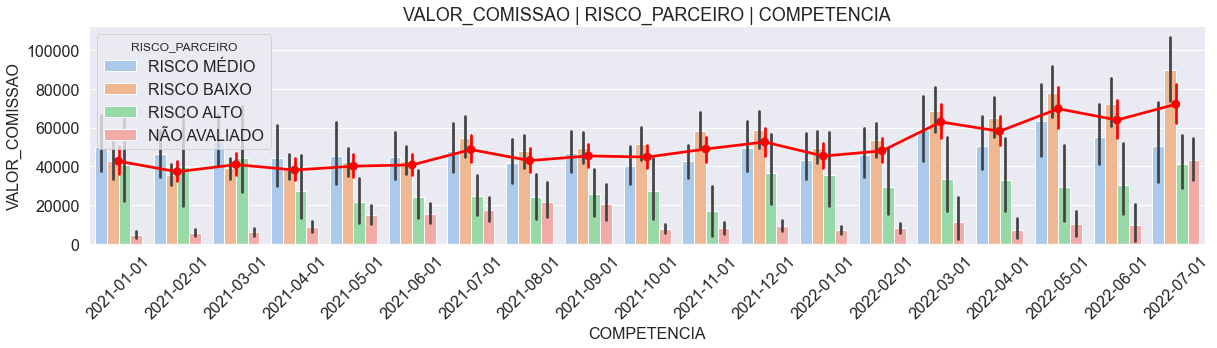

In [48]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.barplot(x="COMPETENCIA", y="VALOR_COMISSAO", data=comissao, ax=ax, hue='RISCO_PARCEIRO')
sns.pointplot(data=comissao, x='COMPETENCIA', y='VALOR_COMISSAO', color='red')

ax.tick_params(axis='x', rotation=45)
plt.title('VALOR_COMISSAO | RISCO_PARCEIRO | COMPETENCIA')
plt.show()

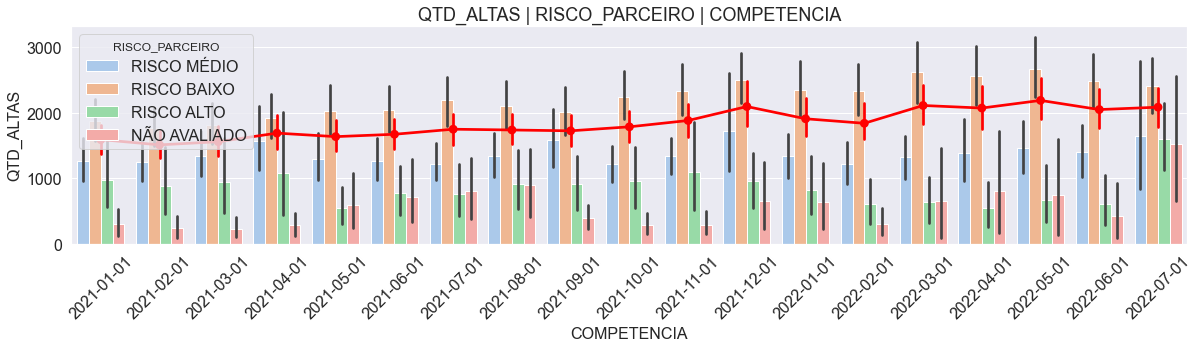

In [49]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.barplot(x="COMPETENCIA", y="QTD_ALTAS", data=comissao, ax=ax, hue='RISCO_PARCEIRO')
sns.pointplot(data=comissao, x='COMPETENCIA', y='QTD_ALTAS', color='red')

ax.tick_params(axis='x', rotation=45)
plt.title('QTD_ALTAS | RISCO_PARCEIRO | COMPETENCIA')
plt.show()

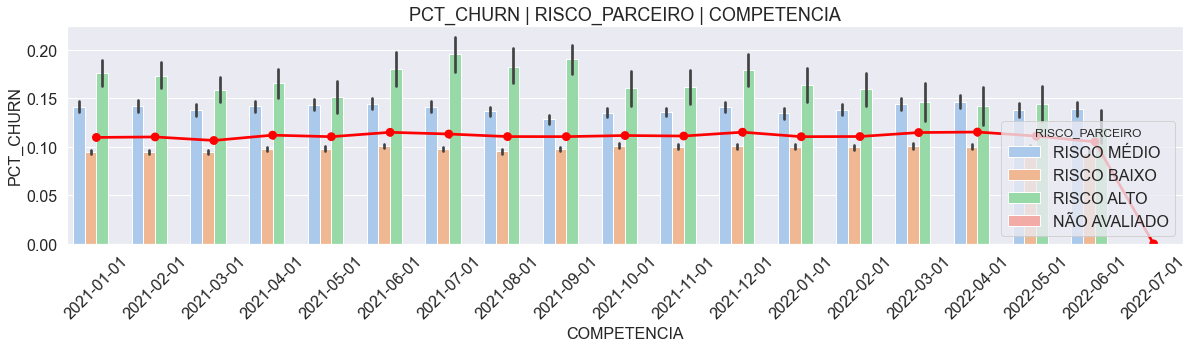

In [50]:
fig, ax = plt.subplots(figsize=(20, 4))

sns.barplot(x="COMPETENCIA", y="PCT_CHURN", data=comissao, ax=ax, hue='RISCO_PARCEIRO')
sns.pointplot(data=comissao, x='COMPETENCIA', y='PCT_CHURN', color='red')

ax.tick_params(axis='x', rotation=45)
plt.title('PCT_CHURN | RISCO_PARCEIRO | COMPETENCIA')
plt.show()

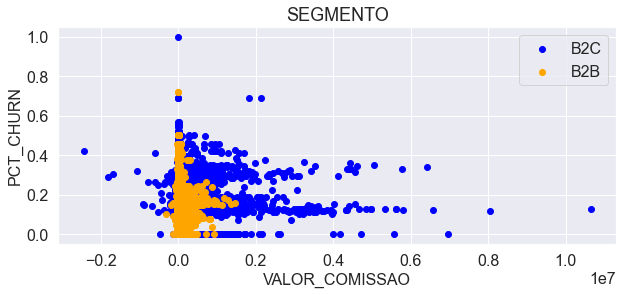

In [51]:
plt.figure(figsize=(10, 4))

columns = ['VALOR_COMISSAO', 'PCT_CHURN', 'SEGMENTO']
colors = ['blue', 'orange']

plt.scatter(comissao[comissao[columns[2]].str.contains('B2C')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('B2C')==True][columns[1]], 
            c = colors[0], label = 'B2C')

plt.scatter(comissao[comissao[columns[2]].str.contains('B2B')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('B2B')==True][columns[1]], 
            c = colors[1], label = 'B2B')

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title(columns[2])
plt.legend()
plt.show()

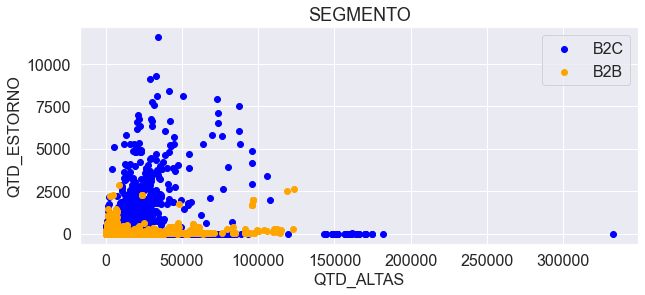

In [52]:
plt.figure(figsize=(10, 4))

columns = ['QTD_ALTAS', 'QTD_ESTORNO', 'SEGMENTO']
colors = ['blue', 'orange']

plt.scatter(comissao[comissao[columns[2]].str.contains('B2C')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('B2C')==True][columns[1]], 
            c = colors[0], label = 'B2C')

plt.scatter(comissao[comissao[columns[2]].str.contains('B2B')==True][columns[0]], 
            comissao[comissao[columns[2]].str.contains('B2B')==True][columns[1]], 
            c = colors[1], label = 'B2B')

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.title(columns[2])
plt.legend()
plt.show()

#### Agrupando a base aliados por fornecedor e competência:

In [53]:
def getdummies(col_unique):
    return list(map(lambda x: normalize('NFKD', x.upper().replace('.','').replace(',','').replace('/','').replace('-','').replace(' ','_')).encode('ASCII', 'ignore').decode('ASCII'), col_unique))

def preprocessdummies(df, column):
    column = column
    cols = getdummies(df[df[column].str.contains('VAZIO')==False][column].unique())
    for i in cols:
        df['{}_{}'.format(column, i)] = df[column].apply(lambda x: 1 if x.upper() == i else 0)

    return df.drop(column, axis=1)


In [54]:
df = comissao.drop(['VALOR_COMISSAO_2020','ALTAS_2020','QTD_ESTORNO_2020'], axis=1) \
            .set_index(['RAIZ_CNPJ', 'NOME_FORNECEDOR', 'COMPETENCIA'])
df.head(3)

SEGMENTO           CANAL      TP_SERVICO SAFRA_ALTA  UF PLATAFORMA  DOC_SAP  VALOR_COMISSAO  QTD_ALTAS  QTD_ESTORNO INDICADOR_RISCO_FIN FATOR_RISCO  PCT_CHURN   CLASSE RISCO_PARCEIRO
RAIZ_CNPJ NOME_FORNECEDOR COMPETENCIA                                                                                                                                                                                       
-1        SERCOM          2021-01-01       NAO  NAO CADASTRADO          OUTROS 2021-01-01  SP     OUTROS        1            0.00          1            0               VAZIO       VAZIO     0.1461  AMARELO    RISCO MÉDIO
          VIACOM          2021-01-01       B2C         REVENDA  RENTABILIZACAO 2021-01-01  SP       FIXA        1          386.34          1            0               VAZIO       VAZIO     0.1054    VERDE    RISCO BAIXO
                          2021-01-01       B2C         REVENDA          OUTROS 2021-01-01  SP       FIXA        1          285.43         16            0               VAZIO       VAZIO     0.1054    VERDE    RISCO BAIXO

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 65145 entries, ('-1', 'SERCOM', datetime.date(2021, 1, 1)) to ('98102924', 'DELTASUL', datetime.date(2022, 7, 1))
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SEGMENTO             65145 non-null  object        
 1   CANAL                65145 non-null  object        
 2   TP_SERVICO           65145 non-null  object        
 3   SAFRA_ALTA           65145 non-null  datetime64[ns]
 4   UF                   65145 non-null  object        
 5   PLATAFORMA           65145 non-null  object        
 6   DOC_SAP              65145 non-null  int32         
 7   VALOR_COMISSAO       65145 non-null  float64       
 8   QTD_ALTAS            65145 non-null  int32         
 9   QTD_ESTORNO          65145 non-null  int32         
 10  INDICADOR_RISCO_FIN  65145 non-null  object        
 11  FATOR_RISCO          65145 non-null  object        
 12  

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DOC_SAP,65145.0,1.000000,0.000000,1.00,1.0000,1.0000,1.0000,1.00
VALOR_COMISSAO,65145.0,48812.932154,212628.163370,-2451793.91,619.9600,5243.6400,27520.0800,10652723.88
QTD_ALTAS,65145.0,1818.760795,7852.329231,-57.00,15.0000,86.0000,416.0000,332619.00
QTD_ESTORNO,65145.0,39.821890,254.140018,-40.00,0.0000,1.0000,10.0000,11630.00
PCT_CHURN,65145.0,0.106309,0.083785,0.00,0.0365,0.1055,0.1577,1.00


In [57]:
for i in df.columns:
    if df[i].dtypes=='object':
        df = preprocessdummies(df, i)

df.head(3)

SAFRA_ALTA  DOC_SAP  VALOR_COMISSAO  QTD_ALTAS  QTD_ESTORNO  PCT_CHURN  SEGMENTO_NAO  SEGMENTO_B2C  SEGMENTO_B2B  CANAL_NAO_CADASTRADO  CANAL_REVENDA  CANAL_CROSSSELLING  CANAL_VAREJO  CANAL_PAP  CANAL_CONSULTIVO  CANAL_DISTRIBUIDOR  CANAL_TELEVENDAS_OUTBOUND  CANAL_TELEVENDAS_INBOUND  CANAL_ESPECIALISTA_TI  CANAL_TELEVENDAS_REGIONAL  CANAL_PAP_UNIFICADO  CANAL_ATACADO  CANAL_PAP_DIRECIONADO  CANAL_DIGITAL_PJ  CANAL_DIGITAL  CANAL_CENTRALIZADO  CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ  CANAL_MARKETPLACE_PJ  CANAL_TELEVENDAS_ONLINE  CANAL_CORPORATIVO  TP_SERVICO_OUTROS  TP_SERVICO_RENTABILIZACAO  TP_SERVICO_CAPTACAO  UF_SP  UF_PR  UF_BA  UF_MG  UF_MS  UF_PE  UF_RS  UF_TO  UF_PA  UF_RO  UF_MT  UF_AC  UF_GO  UF_DF  UF_RJ  UF_SC  UF_PB  UF_ES  UF_AM  UF_PI  UF_CE  UF_MA  UF_SE  UF_RN  UF_RR  UF_AP  UF_AL  PLATAFORMA_OUTROS  PLATAFORMA_FIXA  PLATAFORMA_MOVEL  INDICADOR_RISCO_FIN_MEDIO_RISCO  INDICADOR_RISCO_FIN_BAIXO_RISCO  INDICADOR_RISCO_FIN_ALTO_RISCO  \
RAIZ_CNPJ NOME_FORNECEDOR COMPETENCIA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
-1        SERCOM          2021-01-01  2021-01-01        1            0.00          1            0     0.1461             1             0             0                     0              0                   0             0          0                 0                   0                          0                         0                      0                          0                    0              0                      0                 0              0                   0                                     0                     0                        0                  0                  1                          0                    0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0                  1                0                 0                                0                                0                               0   
          VIACOM          2021-01-01  2021-01-01        1          386.34          1            0     0.1054             0             1             0                     0              1                   0             0          0                 0                   0                          0                         0                      0                          0                    0              0                      0                 0              0                   0                                     0                     0                        0                  0                  0                          1                    0      1      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0                  0                1                 0                                0                                0                               0   
                          2021-01-

In [58]:
df.reset_index(drop=False, inplace=True)
df.head(3)

,RAIZ_CNPJ,NOME_FORNECEDOR,COMPETENCIA,SAFRA_ALTA,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,CANAL_DISTRIBUIDOR,CANAL_TELEVENDAS_OUTBOUND,CANAL_TELEVENDAS_INBOUND,CANAL_ESPECIALISTA_TI,CANAL_TELEVENDAS_REGIONAL,CANAL_PAP_UNIFICADO,CANAL_ATACADO,CANAL_PAP_DIRECIONADO,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO
0,-1,SERCOM,2021-01-01,2021-01-01,1,0.00,1,0,0.1461,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-1,VIACOM,2021-01-01,2021-01-01,1,386.34,1,0,0.1054,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,-1,VIACOM,2021-01-01,2021-01-01,1,285.43,16,0,0.1054,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [59]:
#df['SAFRA_ALTA_COMPETENCIA'] = df.apply(lambda x: 1 if x.COMPETENCIA == x.SAFRA_ALTA else 0, axis=1)
#df[['RAIZ_CNPJ','NOME_FORNECEDOR','COMPETENCIA','SAFRA_ALTA','SAFRA_ALTA_COMPETENCIA']].head()

In [60]:
df = df.drop(['SAFRA_ALTA'], axis=1) \
    .groupby(['COMPETENCIA', 'RAIZ_CNPJ', 'NOME_FORNECEDOR']) \
    .sum() \
    .reset_index(drop=False) \
    .sort_values(by=['COMPETENCIA', 'RAIZ_CNPJ', 'NOME_FORNECEDOR'])

df.head(3)

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,CANAL_DISTRIBUIDOR,CANAL_TELEVENDAS_OUTBOUND,CANAL_TELEVENDAS_INBOUND,CANAL_ESPECIALISTA_TI,CANAL_TELEVENDAS_REGIONAL,CANAL_PAP_UNIFICADO,CANAL_ATACADO,CANAL_PAP_DIRECIONADO,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO
0,2021-01-01,-1,SERCOM,1,0.000000,1,0,0.1461,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2021-01-01,-1,VIACOM,7,15846.970000,347,8,0.7378,0,7,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0
2,2021-01-01,-1,VIKSTAR,4,192421.511644,8121,619,1.3164,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0


#### Existem fornecedores/parceiros com identificadores vazios. 

- Preencher a 'RAIZ_CNPJ' partir do 'NOME_FORNECEDOR' ? Lembrando que a 'RAIZ_CNPJ' é a chave usada no relacionamento com as outras bases.
- Preencher o 'NOME_FORNECEDOR' partir da 'RAIZ_CNPJ' ?

In [61]:
df[(df['RAIZ_CNPJ'] == '-1') | (df['NOME_FORNECEDOR'] == 'VAZIO')]['NOME_FORNECEDOR'].value_counts(ascending=False)

VIACOM     10
VAZIO       8
VIKSTAR     6
SERCOM      4
EVOLUA      1
Name: NOME_FORNECEDOR, dtype: int64

### MAIS ANÁLISES:

#### Parceiros descontinuados:

- EZENTIS BRASIL S.A
- EZENTIS - SERVICOS ENGENHARIA E INSTALACAO DE COMUNICACOES S.A
- HALLEN INSTALACOES DE EQUIPAMENTOS DE TELECOMUNICACOES LTDA
- VIKSTAR CONTACT CENTER S/A

In [62]:
df[df['NOME_FORNECEDOR'].str.contains("VIKSTAR|HALLEN|EZENTIS")==True].head()

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,CANAL_DISTRIBUIDOR,CANAL_TELEVENDAS_OUTBOUND,CANAL_TELEVENDAS_INBOUND,CANAL_ESPECIALISTA_TI,CANAL_TELEVENDAS_REGIONAL,CANAL_PAP_UNIFICADO,CANAL_ATACADO,CANAL_PAP_DIRECIONADO,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO
2,2021-01-01,-1,VIKSTAR,4,1.924215e+05,8121,619,1.3164,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
184,2021-01-01,08075274,VIKSTAR,14,6.254946e+06,122603,7690,4.6074,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,8,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,5,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0
504,2021-01-01,27722377,HALLEN TELECOM,10,1.577472e+05,888,137,0.0000,0,10,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,5,0,0,0,0,0,0,0,0,0,2,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
722,2021-02-01,-1,VIKSTAR,4,1.188465e+05,5866,248,1.3164,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
898,2021-02-01,08075274,VIKSTAR,14,7.407696e+06,133446,6496,4.6074,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,8,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,5,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0


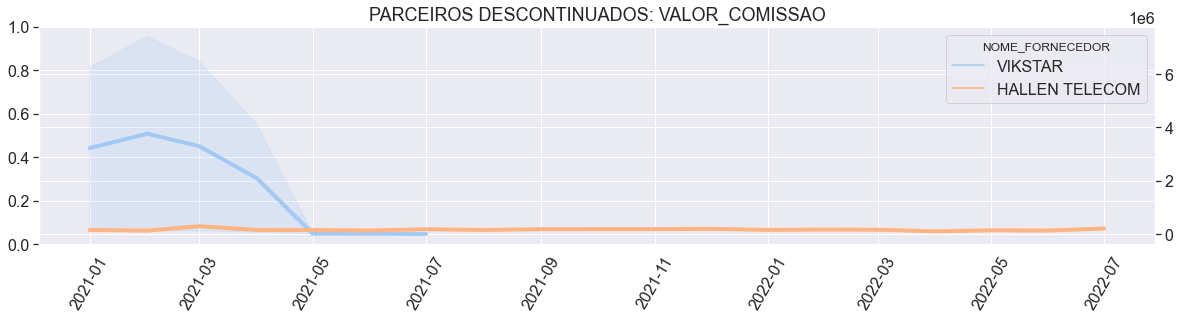

In [63]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="VALOR_COMISSAO", hue='NOME_FORNECEDOR', 
                linewidth=4, 
                data=df[df['NOME_FORNECEDOR'].str.contains("VIKSTAR|HALLEN|EZENTIS")==True])

ax.tick_params(axis='x', rotation=60)
plt.title('PARCEIROS DESCONTINUADOS: VALOR_COMISSAO')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

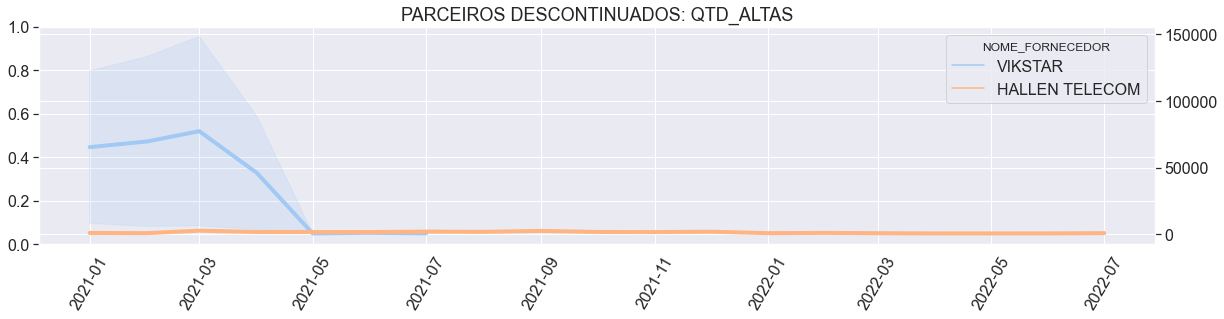

In [64]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="QTD_ALTAS", hue='NOME_FORNECEDOR', 
                linewidth=4, 
                data=df[df['NOME_FORNECEDOR'].str.contains("VIKSTAR|HALLEN|EZENTIS")==True])

ax.tick_params(axis='x', rotation=60)
plt.title('PARCEIROS DESCONTINUADOS: QTD_ALTAS')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

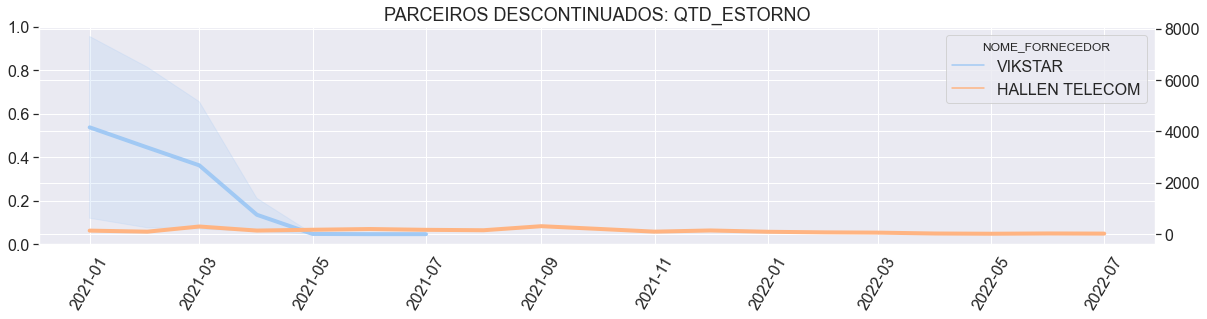

In [65]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="QTD_ESTORNO", hue='NOME_FORNECEDOR', 
                linewidth=4, 
                data=df[df['NOME_FORNECEDOR'].str.contains("VIKSTAR|HALLEN|EZENTIS")==True])

ax.tick_params(axis='x', rotation=60)
plt.title('PARCEIROS DESCONTINUADOS: QTD_ESTORNO')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

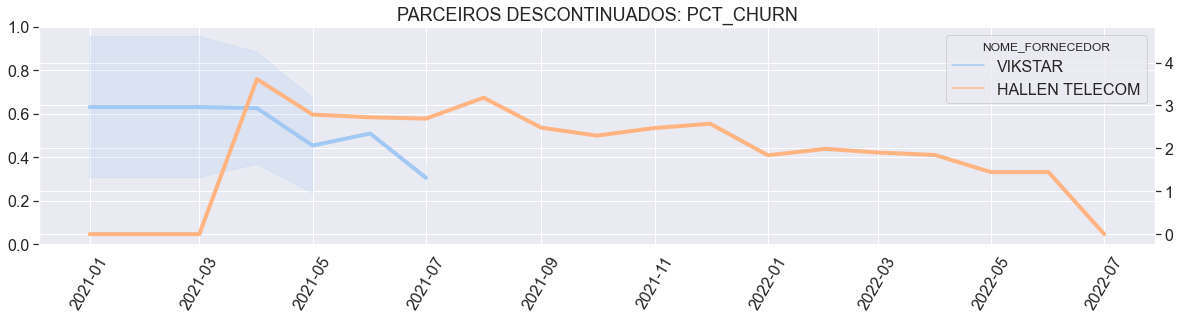

In [66]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="PCT_CHURN", hue='NOME_FORNECEDOR', 
                linewidth=4, 
                data=df[df['NOME_FORNECEDOR'].str.contains("VIKSTAR|HALLEN|EZENTIS")==True])

ax.tick_params(axis='x', rotation=60)
plt.title('PARCEIROS DESCONTINUADOS: PCT_CHURN')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

#### Análise de alguns parceiros:

- ATENTO
- AEC
- KONECTA

In [67]:
df[df['NOME_FORNECEDOR'].str.contains("ATENTO|AEC|CONECTA")==True].head()

,COMPETENCIA,RAIZ_CNPJ,NOME_FORNECEDOR,DOC_SAP,VALOR_COMISSAO,QTD_ALTAS,QTD_ESTORNO,PCT_CHURN,SEGMENTO_NAO,SEGMENTO_B2C,SEGMENTO_B2B,CANAL_NAO_CADASTRADO,CANAL_REVENDA,CANAL_CROSSSELLING,CANAL_VAREJO,CANAL_PAP,CANAL_CONSULTIVO,CANAL_DISTRIBUIDOR,CANAL_TELEVENDAS_OUTBOUND,CANAL_TELEVENDAS_INBOUND,CANAL_ESPECIALISTA_TI,CANAL_TELEVENDAS_REGIONAL,CANAL_PAP_UNIFICADO,CANAL_ATACADO,CANAL_PAP_DIRECIONADO,CANAL_DIGITAL_PJ,CANAL_DIGITAL,CANAL_CENTRALIZADO,CANAL_CANAIS_ALTERNATIVOS__PONTOS_PJ,CANAL_MARKETPLACE_PJ,CANAL_TELEVENDAS_ONLINE,CANAL_CORPORATIVO,TP_SERVICO_OUTROS,TP_SERVICO_RENTABILIZACAO,TP_SERVICO_CAPTACAO,UF_SP,UF_PR,UF_BA,UF_MG,UF_MS,UF_PE,UF_RS,UF_TO,UF_PA,UF_RO,UF_MT,UF_AC,UF_GO,UF_DF,UF_RJ,UF_SC,UF_PB,UF_ES,UF_AM,UF_PI,UF_CE,UF_MA,UF_SE,UF_RN,UF_RR,UF_AP,UF_AL,PLATAFORMA_OUTROS,PLATAFORMA_FIXA,PLATAFORMA_MOVEL,INDICADOR_RISCO_FIN_MEDIO_RISCO,INDICADOR_RISCO_FIN_BAIXO_RISCO,INDICADOR_RISCO_FIN_ALTO_RISCO,FATOR_RISCO_MELHORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_DETERIORACAO_RECENTE_NA_RECEITA,FATOR_RISCO_DETERIORACAO_LONGA_DE_RECEITA,FATOR_RISCO_MELHORIA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_CONTINUA_NA_RECEITA,FATOR_RISCO_PIORA_NO_CURTO_PRAZO_APENAS,FATOR_RISCO_MELHORIA_DE_MEDIO_A_LONGO_PRAZO_NA_RECEITA,FATOR_RISCO_SEM_COMISSAO_OU_APENAS_ESTORNO_EM_M0,FATOR_RISCO_DIVIDA_TRABALHISTA_ELEVADA,CLASSE_AMARELO,CLASSE_VERDE,CLASSE_VERMELHO,CLASSE_LARANJA,RISCO_PARCEIRO_RISCO_MEDIO,RISCO_PARCEIRO_RISCO_BAIXO,RISCO_PARCEIRO_RISCO_ALTO,RISCO_PARCEIRO_NAO_AVALIADO
28,2021-01-01,02879250,ATENTO,14,9.042821e+06,161495,14660,4.1356,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,7,12,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0
112,2021-01-01,05672818,CONECTA MG,5,5.962230e+04,1784,4,0.2055,0,0,5,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0
277,2021-01-01,11190247,CONECTA CELULARES,3,1.647431e+04,248,5,0.2556,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
632,2021-01-01,35928630,JM CONECTA,6,7.442379e+04,347,51,0.7260,0,6,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0
743,2021-02-01,02455233,AEC CONTACT CENTER,1,2.119600e+03,46,4,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


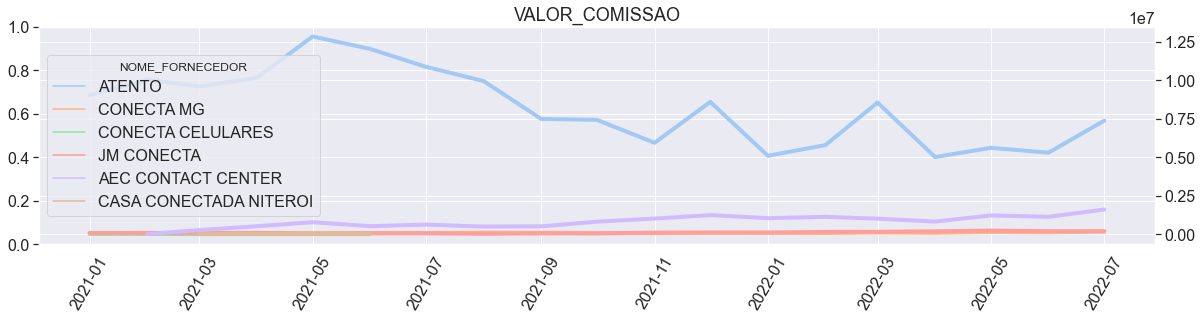

In [68]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="VALOR_COMISSAO", hue='NOME_FORNECEDOR', 
                linewidth=4, 
                data=df[df['NOME_FORNECEDOR'].str.contains("ATENTO|AEC|CONECTA")==True])

ax.tick_params(axis='x', rotation=60)
plt.title('VALOR_COMISSAO')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

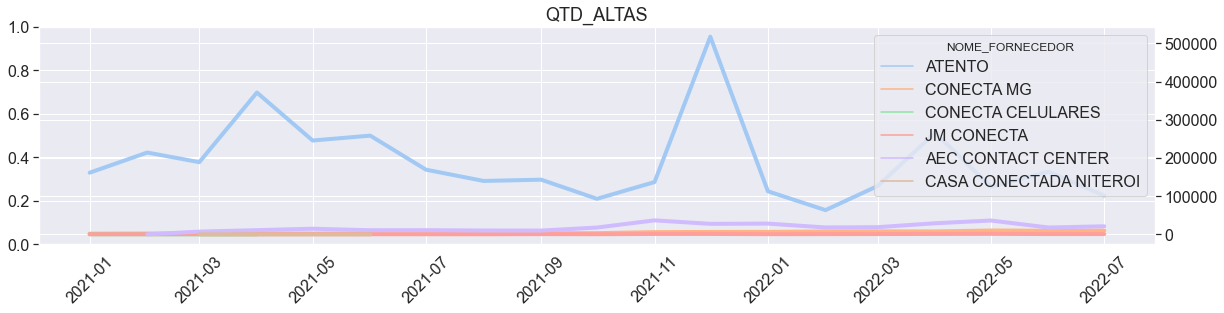

In [69]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="QTD_ALTAS", hue='NOME_FORNECEDOR', 
                linewidth=4, 
                data=df[df['NOME_FORNECEDOR'].str.contains("ATENTO|AEC|CONECTA")==True])

ax.tick_params(axis='x', rotation=45)
plt.title('QTD_ALTAS')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

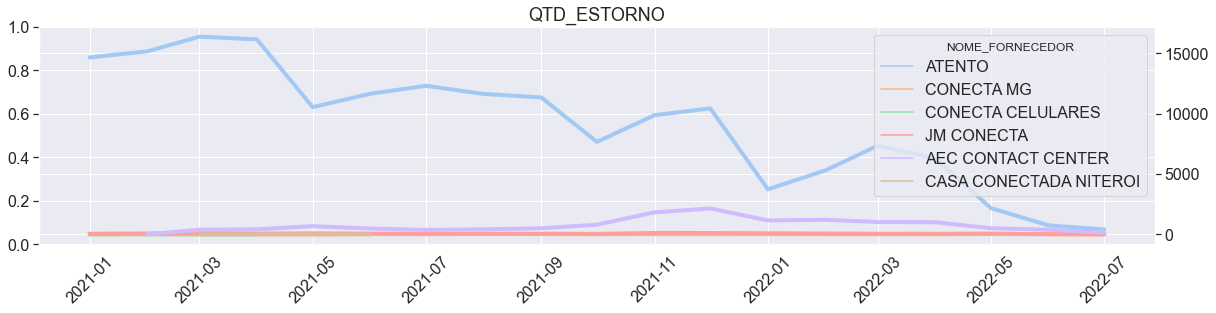

In [70]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="QTD_ESTORNO", hue='NOME_FORNECEDOR', 
                linewidth=4, 
                data=df[df['NOME_FORNECEDOR'].str.contains("ATENTO|AEC|CONECTA")==True])

ax.tick_params(axis='x', rotation=45)
plt.title('QTD_ESTORNO')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

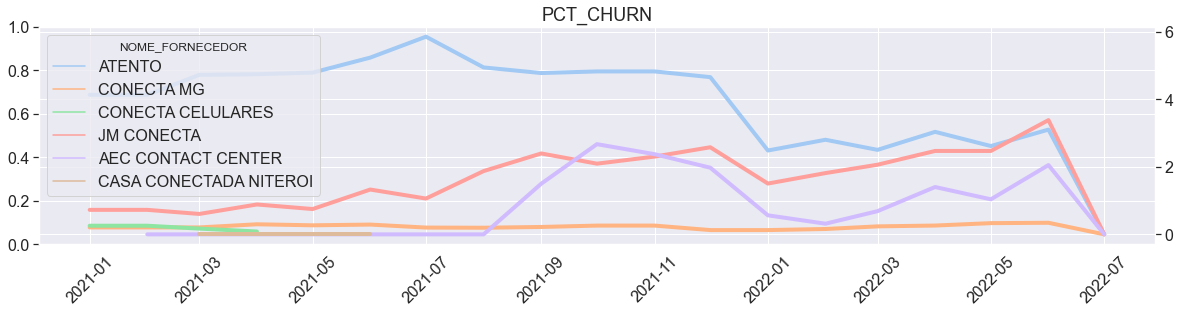

In [71]:
fig, ax = plt.subplots(figsize=(20, 4))
ax_twin = ax.twinx()

sns.lineplot(x="COMPETENCIA", y="PCT_CHURN", hue='NOME_FORNECEDOR', 
                linewidth=4, 
                data=df[df['NOME_FORNECEDOR'].str.contains("ATENTO|AEC|CONECTA")==True])

ax.tick_params(axis='x', rotation=45)
plt.title('PCT_CHURN')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### SALVAR DADOS:

In [72]:
df.to_csv(r'datasets/02_COMISSAO.csv', index = False, sep=';', encoding='utf-8', header='true')

In [73]:
del df
del comissao